 # **IMPORTING THE LIBRARIES**

In [22]:
from tensorflow.keras.preprocessing import image

In [4]:
# Importing libries
import os  # Operating system interfaces
import numpy as np
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

# **LOADING THE DATASETS**

In [5]:
# Importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Importing train dataset
train_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

train_data = train_data.map(lambda x, y: (x / 255.0, y))

Found 10110 files belonging to 10 classes.


In [7]:
# Importing Validation dataset
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

val_data = val_data.map(lambda x, y: (x / 255.0, y))

Found 1000 files belonging to 10 classes.


# **VISUALIZING THE DATA**

In [8]:
# Path to the directory containing images
path = "/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [9]:
# Path to the directory containing images
path = "/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/train/Tomato___Bacterial_spot"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [10]:
# Path to the directory containing images
path = "/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/train/Tomato___healthy"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **TRAINING THE MODEL**

## **MODEL V1**

In [11]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
conv_base.trainable = False

In [13]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
from keras.optimizers import Adam  # or from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
# history = model.fit(train_ds,epochs=5,validation_data=validation_ds)
history = model.fit(train_data, epochs=5, validation_data=val_data, callbacks=[EarlyStopping(patience=0)])

Epoch 1/5
316/316 ━━━━━━━━━━━━━━━━━━━━ 1945s 6s/step - accuracy: 0.3446 - loss: 1.9380 - val_accuracy: 0.7690 - val_loss: 0.8886
Epoch 2/5
316/316 ━━━━━━━━━━━━━━━━━━━━ 36s 112ms/step - accuracy: 0.7625 - loss: 0.7807 - val_accuracy: 0.8480 - val_loss: 0.5029
Epoch 3/5
316/316 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - accuracy: 0.8424 - loss: 0.5117 - val_accuracy: 0.8790 - val_loss: 0.3773
Epoch 4/5
316/316 ━━━━━━━━━━━━━━━━━━━━ 44s 120ms/step - accuracy: 0.8692 - loss: 0.4190 - val_accuracy: 0.8880 - val_loss: 0.3182
Epoch 5/5
316/316 ━━━━━━━━━━━━━━━━━━━━ 40s 116ms/step - accuracy: 0.8949 - loss: 0.3424 - val_accuracy: 0.9060 - val_loss: 0.2743


In [16]:
# Evaluate the model on the validation data
evaluation = model.evaluate(val_data)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.9088 - loss: 0.2729
Validation Loss: 0.27429330348968506
Validation Accuracy: 0.906000018119812


### **Saving the Model_v1**

In [17]:
# Save the full model (architecture + weights + optimizer state)
model.save("/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/tomato_leaf_model.keras")

In [18]:

# STEP 1: Load your validation dataset to extract class names
raw_val_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32
)

# Get class names before mapping
class_names = raw_val_data.class_names

# Normalize images just like during training
val_data = raw_val_data.map(lambda x, y: (x / 255.0, y))

# STEP 2: Function to load and preprocess a single image
def load_and_preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array, img

# STEP 3: Predict function
def predict_image(model, img_path):
    img_array, original_img = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = np.max(prediction)

    # Plot the image and prediction
    plt.imshow(original_img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2%})")
    plt.axis('off')
    plt.show()

    return predicted_class, confidence


Found 1000 files belonging to 10 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


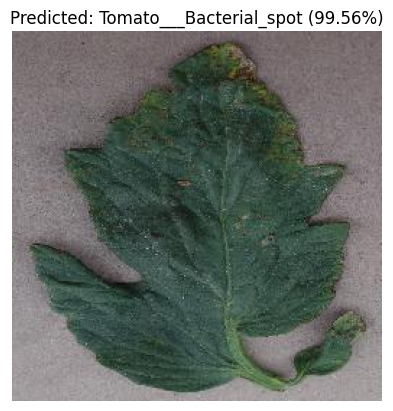

Predicted Class: Tomato___Bacterial_spot
Confidence: 1.0


In [23]:
# Path to the image you want to test
image_path = '/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/val/Tomato___Bacterial_spot/01a3cf3f-94c1-44d5-8972-8c509d62558e___GCREC_Bact.Sp 3396.JPG'

# Predict
predicted_class, confidence = predict_image(model, image_path)

# Output
print("Predicted Class:", predicted_class)
print("Confidence:", round(confidence, 2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


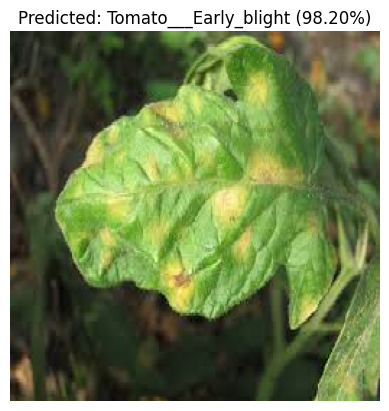

Predicted Class: Tomato___Early_blight
Confidence: 0.98


In [25]:
# Path to the image you want to test
image_path = '/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/test_images/download_1.jpg'

# Predict
predicted_class, confidence = predict_image(model, image_path)

# Output
print("Predicted Class:", predicted_class)
print("Confidence:", round(confidence, 2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


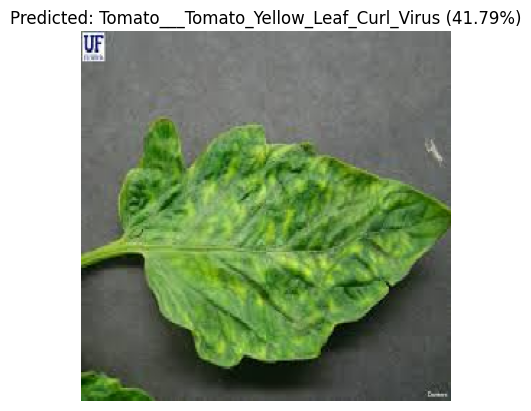

Predicted Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Confidence: 0.42


In [26]:
# Path to the image you want to test
image_path = '/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/test_images/download_2.jpg'

# Predict
predicted_class, confidence = predict_image(model, image_path)

# Output
print("Predicted Class:", predicted_class)
print("Confidence:", round(confidence, 2))


## **MODEL_V2**

In [27]:
# history = model.fit(train_ds,epochs=20,validation_data=validation_ds)
history = model.fit(train_data, epochs=20, validation_data=val_data, callbacks=[EarlyStopping(patience=0)])

Epoch 1/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.9155 - loss: 0.2769 - val_accuracy: 0.9170 - val_loss: 0.2440
Epoch 2/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step - accuracy: 0.9223 - loss: 0.2379 - val_accuracy: 0.9180 - val_loss: 0.2240
Epoch 3/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 39s 121ms/step - accuracy: 0.9412 - loss: 0.1970 - val_accuracy: 0.9270 - val_loss: 0.2047
Epoch 4/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 42s 125ms/step - accuracy: 0.9454 - loss: 0.1801 - val_accuracy: 0.9370 - val_loss: 0.1926
Epoch 5/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 38s 118ms/step - accuracy: 0.9457 - loss: 0.1634 - val_accuracy: 0.9390 - val_loss: 0.1801
Epoch 6/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 37s 116ms/step - accuracy: 0.9518 - loss: 0.1486 - val_accuracy: 0.9420 - val_loss: 0.1736
Epoch 7/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 35s 110ms/step - accuracy: 0.9606 - loss: 0.1326 - val_accuracy: 0.9450 - val_loss: 0.1651
Epoch 8/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 36s 112ms/step - accuracy: 0.9643 - loss: 0

In [28]:
# Evaluate the model on the validation data
evaluation = model.evaluate(val_data)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9376 - loss: 0.1719
Validation Loss: 0.15205606818199158
Validation Accuracy: 0.9449999928474426


### **Saving the Model_v2**

In [29]:
# Save the full model (architecture + weights + optimizer state)
model.save("/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/tomato_leaf_modelV2.keras")

## **Testing a Single Image**

In [30]:
# STEP 1: Load your saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/tomato_leaf_modelV2.keras")

# STEP 1: Load your validation dataset to extract class names
raw_val_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32
)

# Get class names before mapping
class_names = raw_val_data.class_names

# Normalize images just like during training
val_data = raw_val_data.map(lambda x, y: (x / 255.0, y))

# STEP 2: Function to load and preprocess a single image
def load_and_preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array, img

# STEP 3: Predict function
def predict_image(model, img_path):
    img_array, original_img = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = np.max(prediction)

    # Plot the image and prediction
    plt.imshow(original_img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2%})")
    plt.axis('off')
    plt.show()

    return predicted_class, confidence


Found 1000 files belonging to 10 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


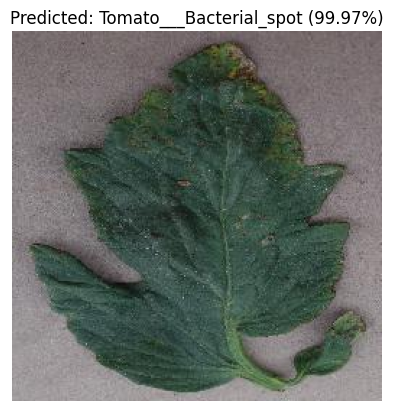

Predicted Class: Tomato___Bacterial_spot
Confidence: 1.0


In [31]:
# Path to the image you want to test
image_path = '/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/val/Tomato___Bacterial_spot/01a3cf3f-94c1-44d5-8972-8c509d62558e___GCREC_Bact.Sp 3396.JPG'

# Predict
predicted_class, confidence = predict_image(model, image_path)

# Output
print("Predicted Class:", predicted_class)
print("Confidence:", round(confidence, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


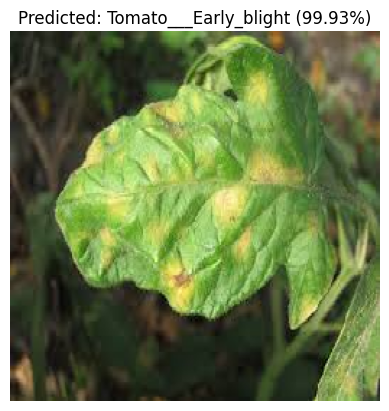

Predicted Class: Tomato___Early_blight
Confidence: 1.0


In [32]:
# Path to the image you want to test
image_path = '/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/test_images/download_1.jpg'

# Predict
predicted_class, confidence = predict_image(model, image_path)

# Output
print("Predicted Class:", predicted_class)
print("Confidence:", round(confidence, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


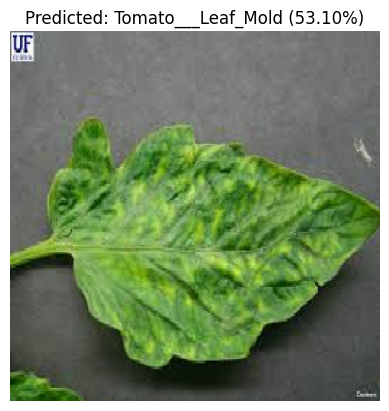

Predicted Class: Tomato___Leaf_Mold
Confidence: 0.53


In [33]:
# Path to the image you want to test
image_path = '/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/test_images/download_2.jpg'

# Predict
predicted_class, confidence = predict_image(model, image_path)

# Output
print("Predicted Class:", predicted_class)
print("Confidence:", round(confidence, 2))

# **COMPALISION BETWEEN MODEL_V1 AND MODEL_V2**

In [34]:
# STEP 1: Load your saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/tomato_leaf_model.keras")

# STEP 1: Load your validation dataset to extract class names
raw_val_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32
)

# Get class names before mapping
class_names = raw_val_data.class_names

# Normalize images just like during training
val_data = raw_val_data.map(lambda x, y: (x / 255.0, y))

# STEP 2: Function to load and preprocess a single image
def load_and_preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array, img

# STEP 3: Predict function
def predict_image_V1(model, img_path):
    img_array, original_img = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = np.max(prediction)

    # Plot the image and prediction
    plt.imshow(original_img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2%})")
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

Found 1000 files belonging to 10 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


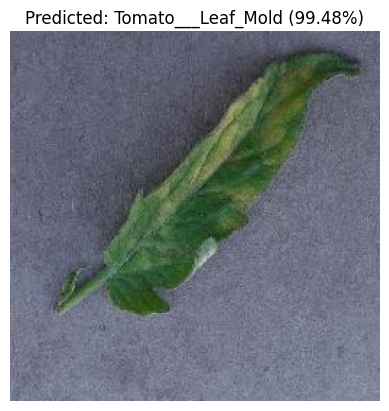

Predicted Class: Tomato___Leaf_Mold
Confidence: 0.99


In [35]:
# Path to the image you want to test
image_path = '/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/val/Tomato___Leaf_Mold/02a29ab9-8cba-47a0-bc2f-e7af7dbae149___Crnl_L.Mold 7165.JPG'

# Predict
predicted_class, confidence = predict_image(model, image_path)

# Output
print("Predicted Class:", predicted_class)
print("Confidence:", round(confidence, 2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


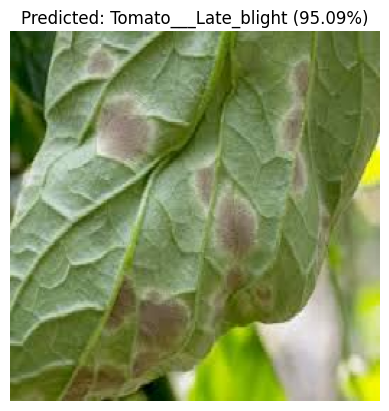

Predicted Class: Tomato___Late_blight
Confidence: 0.95


In [36]:
# Path to the image you want to test
image_path = '/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/test_images/Leaf_mold.jpg'

# Predict
predicted_class, confidence = predict_image(model, image_path)

# Output
print("Predicted Class:", predicted_class)
print("Confidence:", round(confidence, 2))


# MODEL **V1**

In [37]:
# STEP 1: Load your saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/tomato_leaf_modelV2.keras")

# STEP 1: Load your validation dataset to extract class names
raw_val_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32
)

# Get class names before mapping
class_names = raw_val_data.class_names

# Normalize images just like during training
val_data = raw_val_data.map(lambda x, y: (x / 255.0, y))

# STEP 2: Function to load and preprocess a single image
def load_and_preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array, img

# STEP 3: Predict function
def predict_image_V1(model, img_path):
    img_array, original_img = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = np.max(prediction)

    # Plot the image and prediction
    plt.imshow(original_img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2%})")
    plt.axis('off')
    plt.show()

    return predicted_class, confidence


Found 1000 files belonging to 10 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


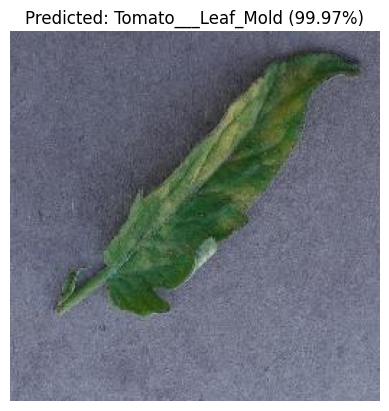

Predicted Class: Tomato___Leaf_Mold
Confidence: 1.0


In [38]:
# Path to the image you want to test
image_path = '/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/val/Tomato___Leaf_Mold/02a29ab9-8cba-47a0-bc2f-e7af7dbae149___Crnl_L.Mold 7165.JPG'

# Predict
predicted_class, confidence = predict_image(model, image_path)

# Output
print("Predicted Class:", predicted_class)
print("Confidence:", round(confidence, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


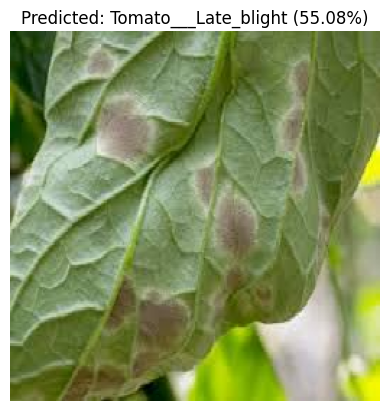

Predicted Class: Tomato___Late_blight
Confidence: 0.55


In [ ]:
# Path to the image you want to test
image_path = '/content/drive/MyDrive/Image Projects/Tomato/Tomato Leaf Disease Detection/test_images/Leaf_mold.jpg'

# Predict
predicted_class, confidence = predict_image_V1(model, image_path)

# Output
print("Predicted Class:", predicted_class)
print("Confidence:", round(confidence, 2))


We may train the model with more images or have a threshold eg anything below 95 should be flaged.